# Telecom X – Parte 2: Predicción de Cancelación (Churn)

## 🧠 Objetivos del Desafío
* Preparar los datos para el modelado (tratamiento, codificación, normalización).
* Realizar análisis de correlación y selección de variables.
* Entrenar dos o más modelos de clasificación.
* Evaluar el rendimiento de los modelos con métricas.
* Interpretar los resultados, incluyendo la importancia de las variables.
* Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

## 1. Preparación

In [1]:
#importar el archivo de datos
import pandas as pd
#cargar el archivo de datos
data = pd.read_csv('datos_tratados.csv',sep=',')
#mostrar las primeras filas del archivo de datos
data.head()


,ID Cliente,Abandono,Género,Mayor de 65 años,Tiene Pareja,Tiene Dependientes,Duración del Contrato (meses),Servicio Telefónico,Múltiples Líneas,Servicio de Internet,...,TV por Cable,Streaming de Películas,Tipo de Contrato,Facturación Sin Papel,Método de Pago,Costo Mensual,Costo Total,Costo Diario,Rango de Contrato,Cantidad de Servicios Contratados
0,0002-ORFBO,0,F,False,1,1,9,1,0,DSL,...,1,0,Anual,1,Cheque por Correo,65.6,593.30,2.19,6-10,3
1,0003-MKNFE,0,M,False,0,0,9,1,1,DSL,...,0,1,Mensual,0,Cheque por Correo,59.9,542.40,2.00,6-10,3
2,0004-TLHLJ,1,M,False,0,0,4,1,0,Fibra Óptica,...,0,0,Mensual,1,Cheque electrónico,73.9,280.85,2.46,0-5,2
3,0011-IGKFF,1,M,True,1,0,13,1,0,Fibra Óptica,...,1,1,Mensual,1,Cheque electrónico,98.0,1237.85,3.27,11-15,4
4,0013-EXCHZ,1,F,True,1,0,3,1,0,Fibra Óptica,...,1,0,Mensual,1,Cheque por Correo,83.9,267.40,2.80,0-5,3


In [2]:
#eliminar las columnas que no son necesarias
data = data.drop(columns=['ID Cliente'])
#Eliminar las filas de rangos de contrato
data = data.drop(columns=['Rango de Contrato'])

In [3]:
# Mostrar las columnas categóricas
cat_cols = data.select_dtypes(include=['object', 'category']).columns
list(cat_cols)

['Género', 'Servicio de Internet', 'Tipo de Contrato', 'Método de Pago']

In [4]:
# Codificar variables categóricas usando one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)
# Mostrar las primeras filas del nuevo DataFrame codificado
data_encoded.head()

,Abandono,Mayor de 65 años,Tiene Pareja,Tiene Dependientes,Duración del Contrato (meses),Servicio Telefónico,Múltiples Líneas,Seguridad en Línea,Respaldo en Línea,Protección del Dispositivo,...,Costo Diario,Cantidad de Servicios Contratados,Género_M,Servicio de Internet_DSL,Servicio de Internet_Fibra Óptica,Tipo de Contrato_Bianual,Tipo de Contrato_Mensual,Método de Pago_Cheque por Correo,Método de Pago_Tarjeta de crédito (automático),Método de Pago_Transferencia bancaria (automático)
0,0,False,1,1,9,1,0,0,1,0,...,2.19,3,False,True,False,False,False,True,False,False
1,0,False,0,0,9,1,1,0,0,0,...,2.00,3,True,True,False,False,True,True,False,False
2,1,False,0,0,4,1,0,0,0,1,...,2.46,2,True,False,True,False,True,False,False,False
3,1,True,1,0,13,1,0,0,1,1,...,3.27,4,True,False,True,False,True,False,False,False
4,1,True,1,0,3,1,0,0,0,0,...,2.80,3,False,False,True,False,True,True,False,False


In [5]:
# Proporción de clientes que abandonaron vs los que aun estan activos
proporcion = data['Abandono'].value_counts(normalize=True)
print("Proporción de cada clase:")
print(proporcion)
# Valores absolutos
print("\nCantidad de clientes por clase:")
print(data['Abandono'].value_counts())

Proporción de cada clase:
Abandono
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Cantidad de clientes por clase:
Abandono
0    5174
1    1869
Name: count, dtype: int64


In [6]:
# Variable dependiente
y = data_encoded['Abandono']
# Variables independientes
X = data_encoded.drop(columns=['Abandono'])

In [7]:
# aplicar SMOTE para balancear el dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
# Mostrar la proporción de clases después de aplicar SMOTE
print("\nProporción de clases después de SMOTE:")
print(y_resampled.value_counts(normalize=True)) 


Proporción de clases después de SMOTE:
Abandono
0    0.5
1    0.5
Name: proportion, dtype: float64


Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8026969481902059


## Análisis de Correlación

In [9]:
#Crear matriz de correlación
correlation_matrix = data_encoded.corr()
# Mostrar la matriz de correlación
print(correlation_matrix)


                                                    Abandono  \
Abandono                                            1.000000   
Mayor de 65 años                                    0.150889   
Tiene Pareja                                       -0.150448   
Tiene Dependientes                                 -0.164221   
Duración del Contrato (meses)                      -0.352229   
Servicio Telefónico                                 0.011942   
Múltiples Líneas                                    0.040102   
Seguridad en Línea                                 -0.171226   
Respaldo en Línea                                  -0.082255   
Protección del Dispositivo                         -0.066160   
Soporte Técnico                                    -0.164674   
TV por Cable                                        0.063228   
Streaming de Películas                              0.061382   
Facturación Sin Papel                               0.191825   
Costo Mensual                           

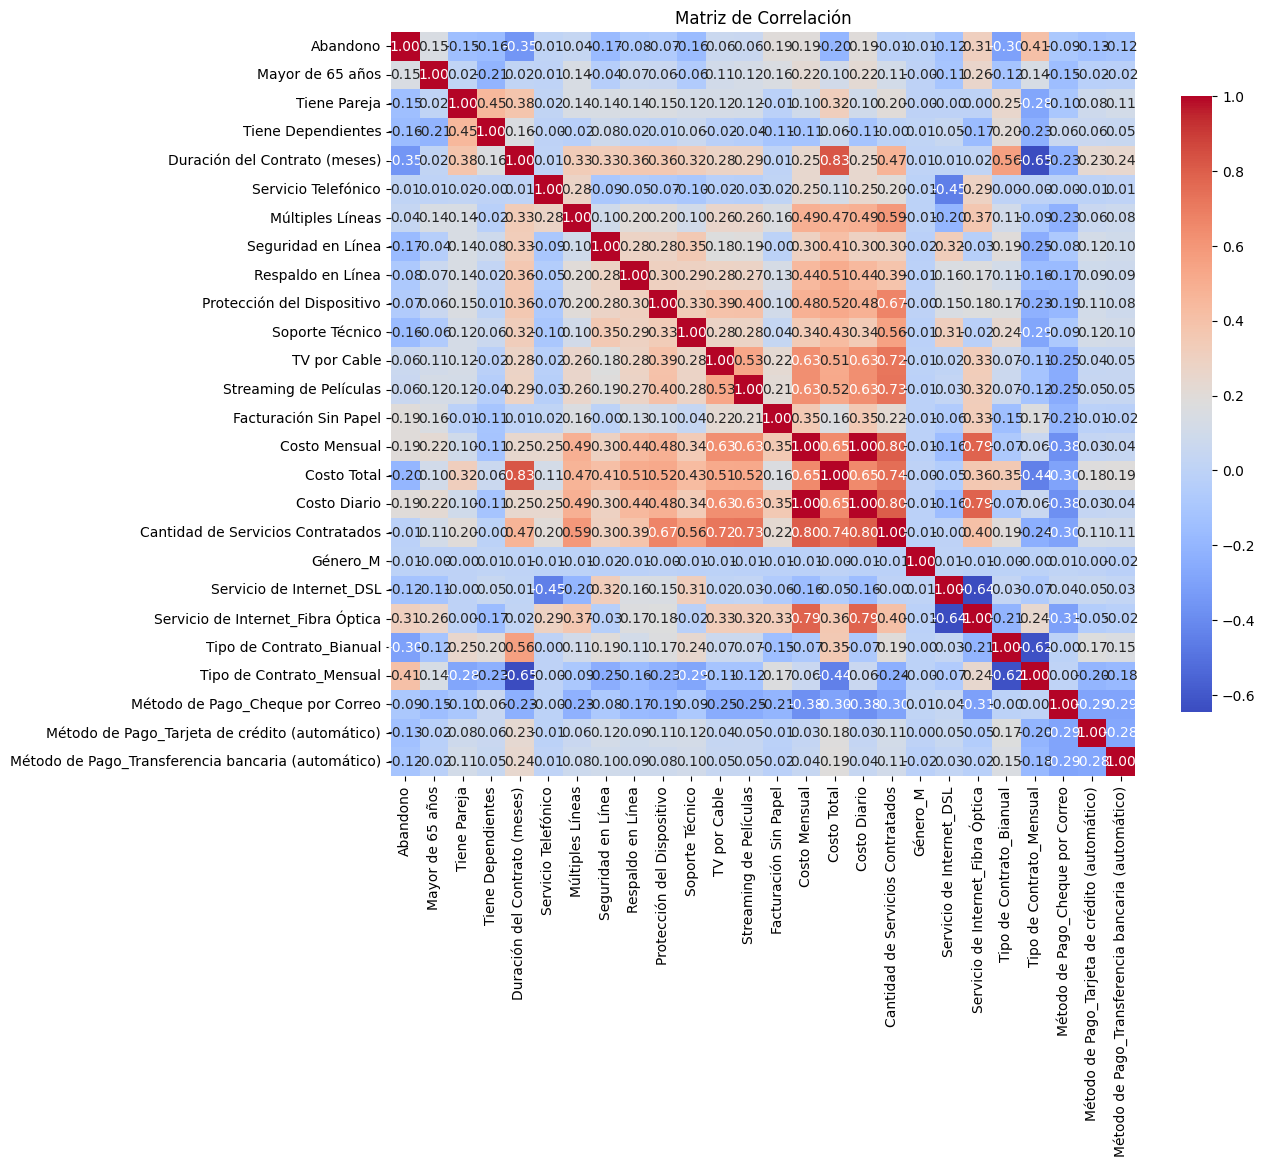

In [10]:
#graficar mapa de calor de la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.show()

Del análisis de correlación puedes concluir lo siguiente:

- **Duración del Contrato** y **Costo Total** presentan una correlación negativa con el abandono, es decir, a menor duración del contrato y menor gasto total, **mayor probabilidad de abandono**.
- Los clientes que permanecen suelen tener contratos más largos y un mayor gasto total.
- Las variables más correlacionadas con el abandono son precisamente la duración del contrato y el gasto total, lo que indica que son factores clave para predecir la cancelación.
- Otras variables pueden tener correlaciones menores, pero estas dos destacan como las más relevantes según la matriz de correlación y los gráficos.

**En resumen:**  
La duración del contrato y el gasto total son variables predictoras importantes del abandono de clientes. Clientes con contratos cortos y bajo gasto tienen mayor riesgo de cancelar el servicio.

## Análisis dirigido

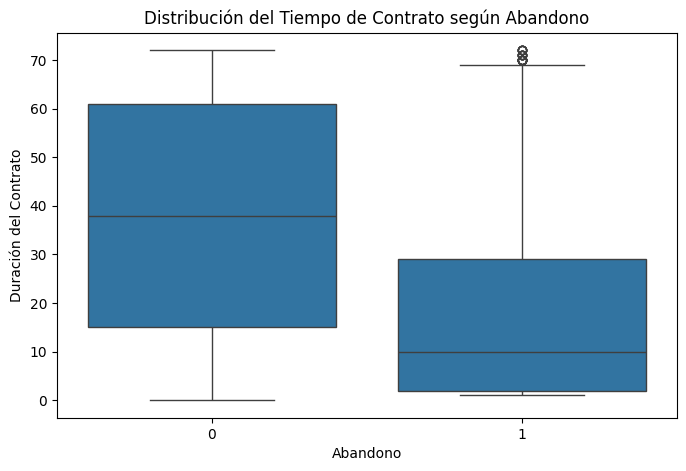

In [11]:
# Boxplot: Tiempo de contrato vs Abandono
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=data_encoded['Abandono'], y=data_encoded['Duración del Contrato (meses)'])
plt.title('Distribución del Tiempo de Contrato según Abandono')
plt.xlabel('Abandono')
plt.ylabel('Duración del Contrato')
plt.show()

Los clientes que abandonan suelen tener una menor duración del contrato en comparación con los que permanecen.
Esto se refleja en que la mediana y los cuartiles inferiores del grupo que abandona están más bajos que los del grupo que no abandona.

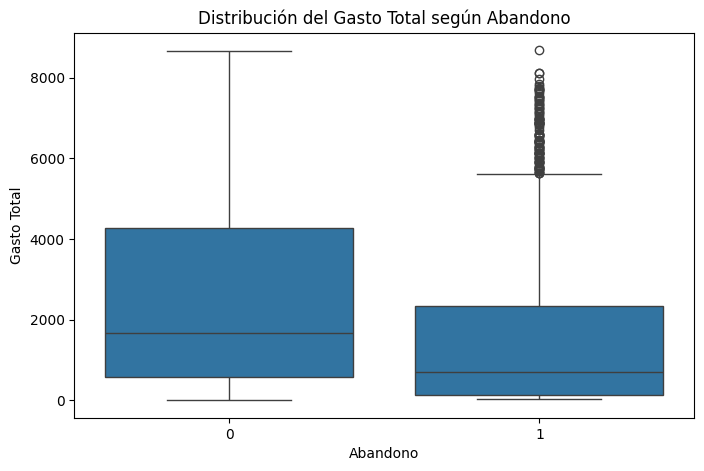

In [12]:
# Boxplot: Gasto total vs Abandono
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_encoded['Abandono'], y=data_encoded['Costo Total'])
plt.title('Distribución del Gasto Total según Abandono')
plt.xlabel('Abandono')
plt.ylabel('Gasto Total')
plt.show()


El gasto total de los clientes que abandonan tiende a ser menor que el de los clientes que permanecen.
Esto puede indicar que los clientes que llevan menos tiempo y gastan menos son más propensos a cancelar.

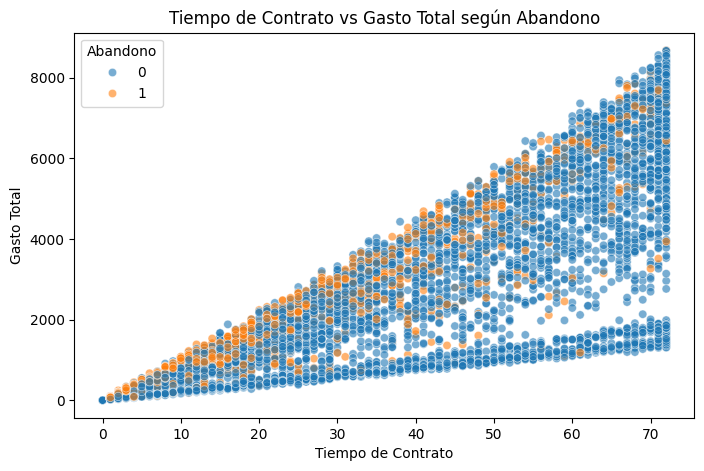

In [13]:
# Scatter plot: Duración de contrato vs Gasto total, coloreado por Abandono
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_encoded['Duración del Contrato (meses)'], y=data_encoded['Costo Total'], hue=data_encoded['Abandono'], alpha=0.6)
plt.title('Tiempo de Contrato vs Gasto Total según Abandono')
plt.xlabel('Tiempo de Contrato')
plt.ylabel('Gasto Total')
plt.legend(title='Abandono')
plt.show()

Se observa que la mayoría de los clientes que abandonan se concentran en la zona de baja duración de contrato y bajo gasto total.
Los clientes con mayor duración y mayor gasto tienden a permanecer activos.
Las variables Duración del Contrato y Costo Total están negativamente relacionadas con el abandono:

* A menor duración y menor gasto, mayor probabilidad de abandono.
* A mayor duración y mayor gasto, menor probabilidad de abandono.
* Estos patrones pueden ayudarte a identificar clientes en riesgo de cancelar y a enfocar estrategias de retención.

## Divide el conjunto de datos en entrenamiento y prueba

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#usar la divisio 80-20 para entrenamiento y prueba
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
modelo_1 = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_1.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo_1.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8026969481902059


In [15]:
!pip install xgboost

In [17]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Entrenar el modelo XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy XGBoost: {accuracy_xgb}')

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/anasayago/CURSO-Alura-Oracle/challenge3-data-science-latam/.venv/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <98D50080-9632-3EA4-B874-146E55453763> /Users/anasayago/CURSO-Alura-Oracle/challenge3-data-science-latam/.venv/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file)"]
